<a href="https://colab.research.google.com/github/ajitheee/cs4990/blob/main/minic_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for warnings suppression
import warnings
warnings.filterwarnings('ignore')

# Set visualizations inline
%matplotlib inline


In [4]:
# Load the dataset (adjust file path if needed)
admissions = pd.read_csv('ADMISSIONS.csv')

# Preview the dataset
admissions.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ADMISSIONS.csv'

In [ ]:
# Check data types and non-null counts
admissions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

In [ ]:
# Checking missing values in each column
missing_values = admissions.isnull().sum()
missing_values[missing_values > 0]


,0
DEATHTIME,53122
LANGUAGE,25332
RELIGION,458
MARITAL_STATUS,10128
EDREGTIME,28099
EDOUTTIME,28099
DIAGNOSIS,25


In [ ]:
admissions_cleaned = admissions.dropna()


In [ ]:
# Step 1: Check your column names
print(admissions.columns)

# Step 2: Identify missing data clearly
missing_values = admissions.isnull().sum()
print(missing_values[missing_values > 0])

# Step 3: Fill missing data correctly (replace with correct column names)
# Example for categorical column:
admissions['ADMISSION_LOCATION'].fillna('Unknown', inplace=True)

# Example for numeric column (if required):
#admissions['LOS'].fillna(admissions['LOS'].mean(), inplace=True)



Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')
DEATHTIME         53122
LANGUAGE          25332
RELIGION            458
MARITAL_STATUS    10128
EDREGTIME         28099
EDOUTTIME         28099
DIAGNOSIS            25
dtype: int64


In [ ]:
# Check duplicates
duplicates = admissions.duplicated().sum()
print(f'Total duplicate rows: {duplicates}')

# Drop duplicates if necessary
admissions.drop_duplicates(inplace=True)


Total duplicate rows: 0


In [ ]:
# Convert string dates into datetime objects
admissions['ADMITTIME'] = pd.to_datetime(admissions['ADMITTIME'])
admissions['DISCHTIME'] = pd.to_datetime(admissions['DISCHTIME'])

# Verify changes
admissions.dtypes


ROW_ID                           int64
SUBJECT_ID                       int64
HADM_ID                          int64
ADMITTIME               datetime64[ns]
DISCHTIME               datetime64[ns]
DEATHTIME                       object
ADMISSION_TYPE                  object
ADMISSION_LOCATION              object
DISCHARGE_LOCATION              object
INSURANCE                       object
LANGUAGE                        object
RELIGION                        object
MARITAL_STATUS                  object
ETHNICITY                       object
EDREGTIME                       object
EDOUTTIME                       object
DIAGNOSIS                       object
HOSPITAL_EXPIRE_FLAG             int64
HAS_CHARTEVENTS_DATA             int64
dtype: object

In [ ]:
# Encode categorical data into numeric format
admissions['ADMISSION_TYPE_CODE'] = admissions['ADMISSION_TYPE'].astype('category').cat.codes

# Check changes
admissions[['ADMISSION_TYPE', 'ADMISSION_TYPE_CODE']].head()


,ADMISSION_TYPE,ADMISSION_TYPE_CODE
0,EMERGENCY,1
1,ELECTIVE,0
2,EMERGENCY,1
3,EMERGENCY,1
4,EMERGENCY,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Now clearly replace 'HADM_ID' below with YOUR numeric column name identified from the previous cell
admissions['HADM_ID_scaled'] = scaler.fit_transform(admissions[['HADM_ID']])

# Check results clearly
admissions[['HADM_ID', 'HADM_ID_scaled']].head()


,HADM_ID,HADM_ID_scaled
0,165315,0.653153
1,152223,0.522230
2,124321,0.243205
3,161859,0.618592
4,129635,0.296346


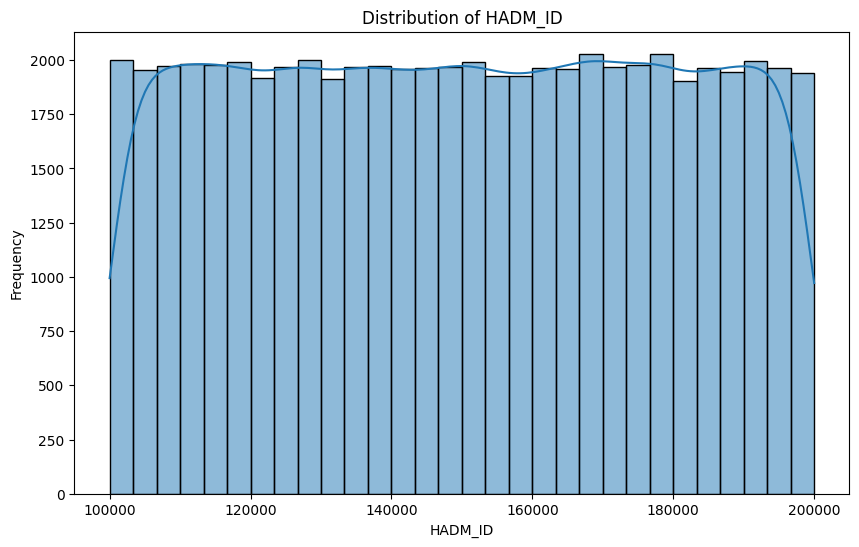

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(admissions['HADM_ID'], kde=True, bins=30)
plt.title('Distribution of HADM_ID')
plt.xlabel('HADM_ID')
plt.ylabel('Frequency')
plt.show()



In [ ]:
import pandas as pd

admissions_cleaned = pd.read_csv('ADMISSIONS.csv')

# Then re-apply your cleaning steps
# ...




In [ ]:
# Verify first
print(admissions_cleaned.head())

# Then clearly save it
admissions_cleaned.to_csv('admissions_cleaned.csv', index=False)


   ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3      24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4      25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE LANGUAGE           RELIGION  \
0  DISC-TRAN CANCER/CHLDRN H   Private      NaN       UNOBTAINABLE   
1           HOME HEALTH CARE  Medicare      NaN           CA

In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8

In [ ]:
import sdv
print(sdv.__version__)


1.20.0


In [2]:
# Imports
import pandas as pd
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata



ModuleNotFoundError: No module named 'sdv'

In [3]:
admissions_cleaned = pd.read_csv('admissions_cleaned.csv')
admissions_cleaned.head()

FileNotFoundError: [Errno 2] No such file or directory: 'admissions_cleaned.csv'

In [ ]:
# STEP 1: Imports
import pandas as pd
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
import os

# STEP 2: Fix multiprocessing on Windows
os.environ["NUMBA_NUM_THREADS"] = "1"
os.environ["JOBLIB_START_METHOD"] = "spawn"

# STEP 3: Load your cleaned admissions dataset
# If admissions_cleaned.csv is not in the current directory, specify the correct path
# admissions_cleaned = pd.read_csv("path/to/admissions_cleaned.csv")  # Replace with the actual path

# If admissions_cleaned.csv is not created in the session, call the cleaning step to create and save it to csv.
# --- Start of cleaning step---
admissions_cleaned = admissions.dropna() # admissions is already loaded in Global variables
print(admissions_cleaned.head())
admissions_cleaned.to_csv('admissions_cleaned.csv', index=False)
# --- End of cleaning step---

admissions_cleaned = pd.read_csv("admissions_cleaned.csv")

# STEP 4: Generate metadata for SINGLE TABLE
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(admissions_cleaned)

# STEP 5: Initialize synthesizer (no enforce_minimal in this version)
synthesizer = CTGANSynthesizer(
    metadata=metadata,
    epochs=300
)

# STEP 6: Fit the synthesizer to the data
synthesizer.fit(admissions_cleaned)

# STEP 7: Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=len(admissions_cleaned))
synthetic_data = synthesizer.sample(num_rows=1000)

# STEP 8: Save synthetic data
synthetic_data.to_csv("synthetic_admissions.csv", index=False)

# STEP 9: Preview
synthetic_data.head()

     ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
193     149         109   189332  2142-08-28 19:48:00  2142-08-30 15:20:00   
196     152         111   155897  2144-07-01 04:12:00  2144-07-01 14:55:00   
238     386         304   177469  2141-05-18 17:21:00  2141-05-19 01:45:00   
303     451         353   159476  2153-06-27 20:15:00  2153-07-07 10:30:00   
358     628         502   116367  2143-10-23 21:05:00  2143-11-04 17:28:00   

               DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
193  2142-08-30 15:20:00      EMERGENCY       EMERGENCY ROOM ADMIT   
196  2144-07-01 14:55:00      EMERGENCY       EMERGENCY ROOM ADMIT   
238  2141-05-19 01:45:00      EMERGENCY       EMERGENCY ROOM ADMIT   
303  2153-07-07 10:30:00      EMERGENCY       EMERGENCY ROOM ADMIT   
358  2143-11-04 17:28:00      EMERGENCY  CLINIC REFERRAL/PREMATURE   

    DISCHARGE_LOCATION INSURANCE LANGUAGE           RELIGION MARITAL_STATUS  \
193       DEAD/EXPIRED  Medicai

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,11249755,96240,116820,2158-05-23 21:18:21,2157-08-19 19:05:31,2189-04-03 23:35:53,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,UNOBTAINABLE,MARRIED,WHITE,2191-06-05 06:57:39,2150-10-19 12:36:06,INTRACRANIAL HEMORRHAGE,1,1
1,15893029,93098,125297,2183-03-27 10:08:33,2115-06-15 21:07:46,2163-08-29 04:32:04,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Self Pay,ENGL,CATHOLIC,SINGLE,WHITE,2207-09-23 15:42:26,2100-06-09 02:34:00,GI BLEED;SEPSIS,1,1
2,230990,94828,125875,2204-11-19 09:44:16,2174-05-09 23:57:56,2146-11-28 04:02:27,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,JEWISH,MARRIED,WHITE,2138-09-16 15:22:45,2145-02-21 04:15:18,CONGESTIVE HEART FAILURE,1,1
3,11732366,98802,119762,2201-11-02 18:06:48,2128-05-02 14:04:24,2134-10-10 19:54:16,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,CANT,JEWISH,MARRIED,BLACK/AFRICAN AMERICAN,2163-08-01 11:18:13,2100-06-09 02:34:00,ACUTE RENAL FAILURE,1,1
4,1737412,26830,184331,2200-05-29 17:13:28,2199-12-26 21:25:56,2166-12-11 05:22:17,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2162-08-26 16:07:40,2109-12-09 10:00:06,LOWER GI BLEED,1,1


In [ ]:
# Step 1: Fit the model (MUST come before sample)
synthesizer.fit(admissions_cleaned)

In [ ]:
# Now try sampling again
synthetic_data = synthesizer.sample(num_rows=1000)
synthetic_data.to_csv("synthetic_admissions.csv", index=False)
synthetic_data.head()

NameError: name 'synthesizer' is not defined

In [ ]:
print("Synthesizer fitted:", synthesizer._fitted)

NameError: name 'synthesizer' is not defined